<center><h1 style='color: #B03A2E; font-size: 50px'>Deep Learning</h1>
<h2 style='color: #B03A2E; font-size: 20px'>PAINTING’S STYLE RECOGNITION </h2></center>

<center><h1 style='color: #000000; font-size: 15px'>Ana Carrelha m20200631</h1>
<h1 style='color: #000000; font-size: 15px'>Inês Melo m20200624</h1>
<h1 style='color: #000000; font-size: 15px'>Inês Roque m20200644</h1><enter>

In [134]:
import pandas as pd
import numpy as np
from keras import optimizers
from keras import layers, models 
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  
from keras.models import Sequential  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg
%matplotlib inline
import math
import datetime
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sn

In [3]:
import PIL
from PIL import Image
PIL.Image.MAX_IMAGE_PIXELS = 933120000

In [4]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Directories with the data set

In [2]:
train_data_dir = 'data/train'  
validation_data_dir = 'data/valid' 
test_data_dir= 'data/test'

### BUILDING THE GENERAL STRUCTURED NETWORK

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) 
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

### TRAINING THE MODEL

In [11]:
model.compile(loss='categorical_crossentropy', 
               optimizer=optimizers.RMSprop(lr=1e-4),
               metrics=['acc'])

### DATA PREPROCESSING

In [12]:

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,                     
    target_size=(150,150),         
    batch_size = 246,                               
    class_mode='categorical'            
    )                             


validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,                
    target_size=(150,150),         
    batch_size = 246, 
    class_mode='categorical'             
    )   

for data_batch, labels_batch in train_generator: 
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 24698 images belonging to 4 classes.
Found 4000 images belonging to 4 classes.
data batch shape: (246, 150, 150, 3)
labels batch shape: (246, 4)


### MODEL FITTING WITH BATCH GENERATOR

In [13]:

history = model.fit(
    train_generator,   
    epochs = 30, 
    validation_data = validation_generator, 
    )

model.save('paintings1.h5')

Epoch 1/30
101/101 [==============================] - 910s 9s/step - loss: 1.3230 - acc: 0.3623 - val_loss: 1.3102 - val_acc: 0.3470
Epoch 2/30
101/101 [==============================] - 904s 9s/step - loss: 1.2535 - acc: 0.4170 - val_loss: 1.2280 - val_acc: 0.4390
Epoch 3/30
101/101 [==============================] - 905s 9s/step - loss: 1.2167 - acc: 0.4431 - val_loss: 1.1908 - val_acc: 0.4615
Epoch 4/30
101/101 [==============================] - 900s 9s/step - loss: 1.1907 - acc: 0.4595 - val_loss: 1.1827 - val_acc: 0.4742
Epoch 5/30
101/101 [==============================] - 904s 9s/step - loss: 1.1660 - acc: 0.4770 - val_loss: 1.1600 - val_acc: 0.4745
Epoch 6/30
101/101 [==============================] - 901s 9s/step - loss: 1.1488 - acc: 0.4900 - val_loss: 1.1916 - val_acc: 0.4392
Epoch 7/30
101/101 [==============================] - 901s 9s/step - loss: 1.1292 - acc: 0.5028 - val_loss: 1.1288 - val_acc: 0.5025
Epoch 8/30
101/101 [==============================] - 904s 9s/step - 

### Curves of loss and accuracy during training

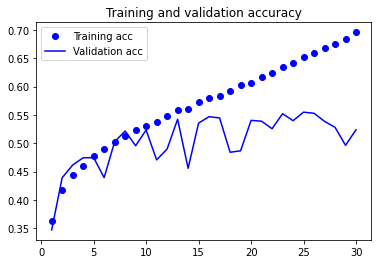

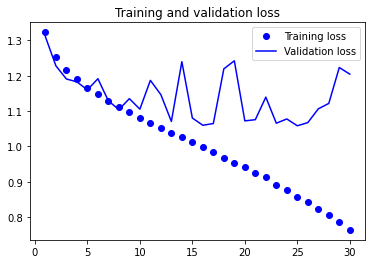

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### DEFINING A NEW CONVNET THAT INCLUDES DROPOUT

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
               optimizer=optimizers.RMSprop(lr=1e-4),
               metrics=['acc'])

#### Training the convnet using data-augmentation generators

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,                
    target_size=(150,150),         
    batch_size = 246, 
    class_mode='categorical')  

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,                
    target_size=(150,150),         
    batch_size = 246, 
    class_mode='categorical')  



Found 24698 images belonging to 4 classes.
Found 4000 images belonging to 4 classes.


In [24]:
history = model.fit(
    train_generator, 
    epochs = 40, 
    validation_data = validation_generator) 
model.save('paintings2.h5')

Epoch 1/40
101/101 [==============================] - 1098s 11s/step - loss: 1.3485 - acc: 0.3373 - val_loss: 1.3320 - val_acc: 0.3495
Epoch 2/40
101/101 [==============================] - 1016s 10s/step - loss: 1.2935 - acc: 0.3861 - val_loss: 1.2677 - val_acc: 0.3988
Epoch 3/40
101/101 [==============================] - 1015s 10s/step - loss: 1.2662 - acc: 0.4038 - val_loss: 1.2627 - val_acc: 0.4053
Epoch 4/40
101/101 [==============================] - 1015s 10s/step - loss: 1.2418 - acc: 0.4197 - val_loss: 1.2574 - val_acc: 0.4260
Epoch 5/40
101/101 [==============================] - 1028s 10s/step - loss: 1.2248 - acc: 0.4327 - val_loss: 1.2681 - val_acc: 0.4128
Epoch 6/40
101/101 [==============================] - 1015s 10s/step - loss: 1.2124 - acc: 0.4424 - val_loss: 1.3375 - val_acc: 0.4030
Epoch 7/40
101/101 [==============================] - 1014s 10s/step - loss: 1.2034 - acc: 0.4506 - val_loss: 1.1920 - val_acc: 0.4602
Epoch 8/40
101/101 [==============================] - 1

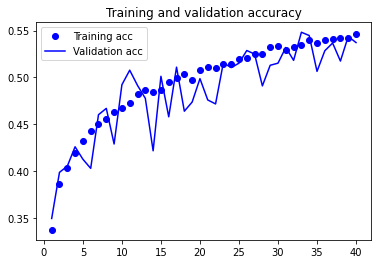

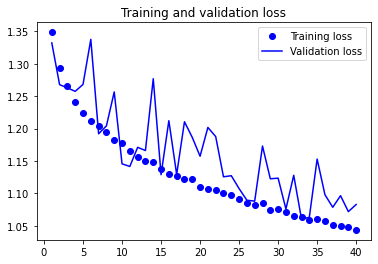

In [25]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Improving accuracy- Creation of weights with VGG16

In [3]:
#Loading vgc16 model
vgg16 = applications.VGG16(include_top=False, weights='imagenet')

datagen = ImageDataGenerator(rescale=1. / 255) 

bottleneck features for train

In [50]:
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(224, 224), 
    batch_size=50, 
    class_mode='categorical', 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / 100)) 
 
bott_feat_train = vgg16.predict(generator, predict_size_train) 
 
np.save('bott_feat_train1.npy', bott_feat_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 24698 images belonging to 4 classes.
Time:  1:59:30.367533


bottleneck features for validation

In [51]:
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(224, 224), 
    batch_size=50, 
    class_mode='categorical', 
    shuffle=False) 
 
nb_val_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_val = int(math.ceil(nb_val_samples / 100)) 
 
bott_feat_val = vgg16.predict(generator, predict_size_val) 
 
np.save('bott_feat_val1.npy', bott_feat_val)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 4000 images belonging to 4 classes.
Time:  0:19:23.143707


bottleneck features for test

In [52]:
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    test_data_dir, 
    target_size=(224, 224), 
    batch_size=50, 
    class_mode='categorical', 
    shuffle=False) 
 
nb_test_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_test = int(math.ceil(nb_test_samples / 100)) 
 
bott_feat_test = vgg16.predict(generator, predict_size_test) 
 
np.save('bott_feat_test1.npy', bott_feat_test)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 8766 images belonging to 4 classes.
Time:  0:42:15.609012


#### training the model

In [75]:
datagen = ImageDataGenerator(rescale=1./255)  
generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(150, 150), 
    batch_size=50, 
    class_mode='categorical', 
    shuffle=False)


nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)
# load the bottleneck features saved earlier  
train_data = np.load('bott_feat_train1.npy')   
# convert the training labels to categorical vectors  
train_labels = to_categorical(generator.classes, num_classes=num_classes) 

Found 24698 images belonging to 4 classes.


In [76]:
generator = datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(150, 150), 
    batch_size=50, 
    class_mode='categorical', 
    shuffle=False) 
   
nb_val_samples = len(generator.filenames)  
   
validation_data = np.load('bott_feat_val1.npy')  

validation_labels = to_categorical(generator.classes , num_classes=num_classes)

Found 4000 images belonging to 4 classes.


In [77]:
generator = datagen.flow_from_directory( 
    test_data_dir, 
    target_size=(150, 150), 
    batch_size=50, 
    class_mode='categorical', 
    shuffle=False) 
   
nb_test_samples = len(generator.filenames)  
   
test_data = np.load('bott_feat_test1.npy')  

test_labels = to_categorical(generator.classes , num_classes=num_classes)

Found 8766 images belonging to 4 classes.


In [78]:

model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(512, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation='relu'))  
model.add(Dropout(0.5)) 
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
               optimizer=optimizers.RMSprop(lr=1e-4),
               metrics=['acc'])


model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               12845568  
_________________________________________________________________
dropout_33 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 50)                25650     
_________________________________________________________________
dropout_34 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 204       
Total params: 12,871,422
Trainable params: 12,871,422
Non-trainable params: 0
_________________________________________

In [79]:
history = model.fit(train_data, train_labels,  
      epochs=20,  
      batch_size=50,  
      validation_data=(validation_data, validation_labels)) 
model.save('paintings3vgg5.h5')

Epoch 1/20
494/494 [==============================] - 117s 236ms/step - loss: 1.3019 - acc: 0.3784 - val_loss: 1.1985 - val_acc: 0.4565
Epoch 2/20
494/494 [==============================] - 117s 237ms/step - loss: 1.1963 - acc: 0.4468 - val_loss: 1.1278 - val_acc: 0.4967
Epoch 3/20
494/494 [==============================] - 111s 225ms/step - loss: 1.1495 - acc: 0.4821 - val_loss: 1.0973 - val_acc: 0.5247
Epoch 4/20
494/494 [==============================] - 115s 234ms/step - loss: 1.1221 - acc: 0.5005 - val_loss: 1.0982 - val_acc: 0.5228
Epoch 5/20
494/494 [==============================] - 116s 236ms/step - loss: 1.0952 - acc: 0.5136 - val_loss: 1.0910 - val_acc: 0.5275
Epoch 6/20
494/494 [==============================] - 111s 225ms/step - loss: 1.0736 - acc: 0.5332 - val_loss: 1.1193 - val_acc: 0.5167
Epoch 7/20
494/494 [==============================] - 117s 237ms/step - loss: 1.0533 - acc: 0.5436 - val_loss: 1.0536 - val_acc: 0.5550
Epoch 8/20
494/494 [============================

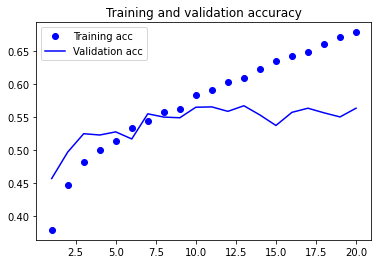

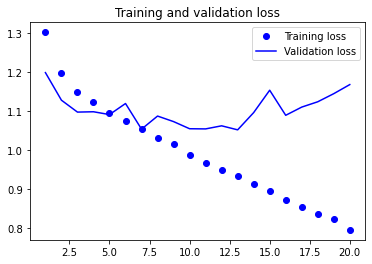

In [81]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Fine tunning - changing optimizer to Adam

In [82]:
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(512, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation='relu'))  
model.add(Dropout(0.5)) 
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
               optimizer='Adam',
               metrics=['acc'])

In [83]:
history = model.fit(train_data, train_labels,  
      epochs=20,  
      batch_size=50,  
      validation_data=(validation_data, validation_labels)) 
model.save('paintings3vgg5.h5')

Epoch 1/20
494/494 [==============================] - 67s 136ms/step - loss: 1.4516 - acc: 0.2878 - val_loss: 1.3637 - val_acc: 0.2955
Epoch 2/20
494/494 [==============================] - 69s 139ms/step - loss: 1.3431 - acc: 0.3173 - val_loss: 1.2429 - val_acc: 0.4300
Epoch 3/20
494/494 [==============================] - 67s 136ms/step - loss: 1.2840 - acc: 0.3755 - val_loss: 1.2545 - val_acc: 0.4243
Epoch 4/20
494/494 [==============================] - 62s 126ms/step - loss: 1.2354 - acc: 0.4181 - val_loss: 1.1870 - val_acc: 0.4550
Epoch 5/20
494/494 [==============================] - 63s 128ms/step - loss: 1.1909 - acc: 0.4495 - val_loss: 1.1719 - val_acc: 0.4613
Epoch 6/20
494/494 [==============================] - 70s 141ms/step - loss: 1.1605 - acc: 0.4713 - val_loss: 1.1302 - val_acc: 0.4882
Epoch 7/20
494/494 [==============================] - 65s 131ms/step - loss: 1.1374 - acc: 0.4835 - val_loss: 1.1033 - val_acc: 0.5173
Epoch 8/20
494/494 [==============================] - 7

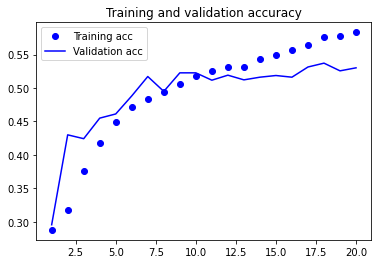

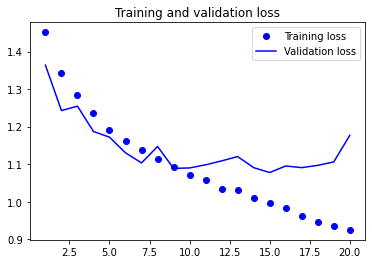

In [85]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Experimenting different model 

In [71]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True) 
train_generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(150, 150), 
    batch_size=128)


test_datagen = ImageDataGenerator(rescale=1./255)

val_generator = test_datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(150, 150), 
    batch_size=128)

Found 24698 images belonging to 4 classes.
Found 4000 images belonging to 4 classes.


In [72]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(150,150,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])

model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)      

In [73]:

history = model.fit(train_generator, validation_data=val_generator,
                                  epochs=30, steps_per_epoch=len(train_generator.filenames) /128, verbose=1)
model.save('paintingstop.h5')

Epoch 1/30
193/192 [==============================] - 881s 5s/step - loss: 1.3448 - accuracy: 0.3284 - val_loss: 1.3039 - val_accuracy: 0.3705
Epoch 2/30
193/192 [==============================] - 863s 4s/step - loss: 1.2417 - accuracy: 0.4150 - val_loss: 1.2536 - val_accuracy: 0.4202
Epoch 3/30
193/192 [==============================] - 874s 5s/step - loss: 1.1872 - accuracy: 0.4572 - val_loss: 1.1893 - val_accuracy: 0.4670
Epoch 4/30
193/192 [==============================] - 869s 5s/step - loss: 1.1413 - accuracy: 0.4917 - val_loss: 1.2142 - val_accuracy: 0.4627
Epoch 5/30
193/192 [==============================] - 865s 4s/step - loss: 1.1155 - accuracy: 0.5072 - val_loss: 1.1082 - val_accuracy: 0.5245
Epoch 6/30
193/192 [==============================] - 868s 4s/step - loss: 1.0980 - accuracy: 0.5194 - val_loss: 1.1399 - val_accuracy: 0.5150
Epoch 7/30
193/192 [==============================] - 865s 4s/step - loss: 1.0752 - accuracy: 0.5290 - val_loss: 1.1199 - val_accuracy: 0.5138

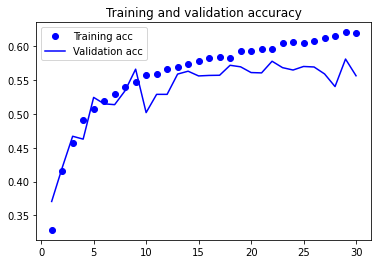

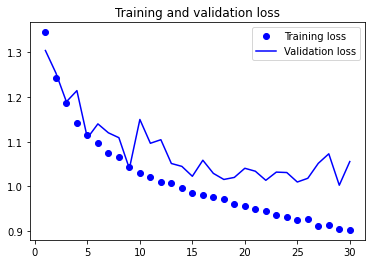

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Fine Tuning 
decreasing bach size, increasing dropout

In [19]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    zoom_range=0.20,
    shear_range=0.3,
    horizontal_flip=True) 

train_generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(150, 150), 
    batch_size=100)


test_datagen = ImageDataGenerator(rescale=1./255)

val_generator = test_datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(150, 150), 
    batch_size=100)

Found 24698 images belonging to 4 classes.
Found 4000 images belonging to 4 classes.


In [20]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(150,150,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [21]:

history = model.fit(train_generator, validation_data=val_generator,
                                  epochs=35, steps_per_epoch=len(train_generator.filenames) /100, verbose=1)

Epoch 1/35
247/246 [==============================] - 885s 4s/step - loss: 1.3343 - accuracy: 0.3437 - val_loss: 1.3356 - val_accuracy: 0.3605
Epoch 2/35
247/246 [==============================] - 864s 3s/step - loss: 1.2564 - accuracy: 0.4083 - val_loss: 1.2694 - val_accuracy: 0.4038
Epoch 3/35
247/246 [==============================] - 864s 3s/step - loss: 1.2192 - accuracy: 0.4405 - val_loss: 1.2416 - val_accuracy: 0.4162
Epoch 4/35
247/246 [==============================] - 863s 3s/step - loss: 1.1855 - accuracy: 0.4662 - val_loss: 1.2144 - val_accuracy: 0.4570
Epoch 5/35
247/246 [==============================] - 864s 3s/step - loss: 1.1585 - accuracy: 0.4775 - val_loss: 1.2255 - val_accuracy: 0.4550
Epoch 6/35
247/246 [==============================] - 864s 3s/step - loss: 1.1393 - accuracy: 0.4957 - val_loss: 1.1915 - val_accuracy: 0.4622
Epoch 7/35
247/246 [==============================] - 866s 4s/step - loss: 1.1249 - accuracy: 0.4991 - val_loss: 1.1916 - val_accuracy: 0.4633

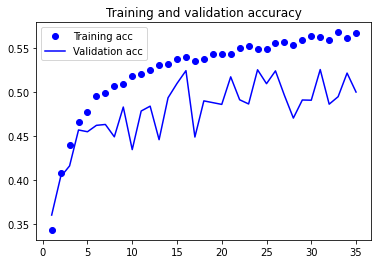

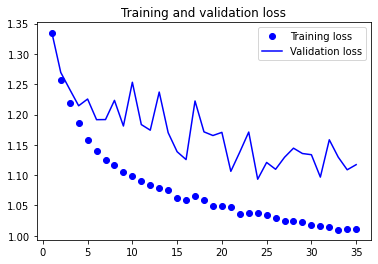

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Other attempts

In [33]:
datagen = ImageDataGenerator(
    rescale=1./255)
 
generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(224, 224), 
    batch_size=10, 
    class_mode='categorical', 
    shuffle=False)


nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)
# load the bottleneck features saved earlier  
train_data = np.load('bott_feat_train1.npy')   
# convert the training labels to categorical vectors  
train_labels = to_categorical(generator.classes, num_classes=num_classes) 

Found 24698 images belonging to 4 classes.


In [34]:
generator = datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(224, 224), 
    batch_size=10, 
    class_mode='categorical', 
    shuffle=False) 
   
nb_val_samples = len(generator.filenames)  
   
validation_data = np.load('bott_feat_val1.npy')  

validation_labels = to_categorical(generator.classes , num_classes=num_classes)

Found 4000 images belonging to 4 classes.


In [35]:
generator = datagen.flow_from_directory( 
    test_data_dir, 
    target_size=(224, 224), 
    batch_size=10, 
    class_mode='categorical', 
    shuffle=False) 
   
nb_test_samples = len(generator.filenames)  
   
test_data = np.load('bott_feat_test1.npy')  

test_labels = to_categorical(generator.classes , num_classes=num_classes)

Found 8766 images belonging to 4 classes.


In [40]:
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))    
model.add(Dropout(0.5))  
model.add(Dense(512, activation='relu'))  
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
               optimizer='Adam',
               metrics=['accuracy'])


model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 25088)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               12845568  
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 2052      
Total params: 12,847,620
Trainable params: 12,847,620
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(train_data, train_labels,  
      epochs=20,  
      batch_size=10,  
      validation_data=(validation_data, validation_labels)) 
model.save('paintings3vgg6.h5')

Epoch 1/20
2470/2470 [==============================] - 216s 87ms/step - loss: 1.1901 - accuracy: 0.4834 - val_loss: 1.1267 - val_accuracy: 0.4960
Epoch 2/20
2470/2470 [==============================] - 211s 85ms/step - loss: 1.0590 - accuracy: 0.5316 - val_loss: 1.0561 - val_accuracy: 0.5337
Epoch 3/20
2470/2470 [==============================] - 212s 86ms/step - loss: 1.0128 - accuracy: 0.5611 - val_loss: 1.0895 - val_accuracy: 0.5343
Epoch 4/20
2470/2470 [==============================] - 216s 87ms/step - loss: 0.9777 - accuracy: 0.5752 - val_loss: 1.0906 - val_accuracy: 0.5415
Epoch 5/20
2470/2470 [==============================] - 210s 85ms/step - loss: 0.9467 - accuracy: 0.5911 - val_loss: 1.0675 - val_accuracy: 0.5487
Epoch 6/20
2470/2470 [==============================] - 209s 84ms/step - loss: 0.9244 - accuracy: 0.6099 - val_loss: 1.0430 - val_accuracy: 0.5590
Epoch 7/20
2470/2470 [==============================] - 212s 86ms/step - loss: 0.9005 - accuracy: 0.6142 - val_loss: 1

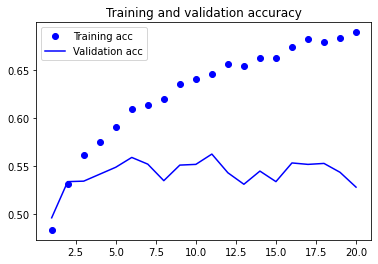

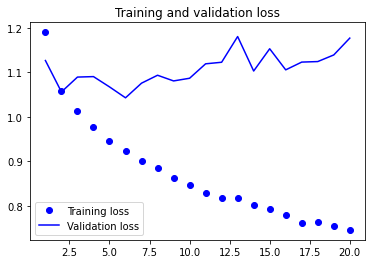

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [68]:
from keras.regularizers import l2
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:])) 
model.add(Dense(256, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu')) 
model.add(Dense(num_classes, activation='softmax'))




model.compile(loss='categorical_crossentropy', 
               optimizer=optimizers.RMSprop(lr=1e-3),
               metrics=['accuracy'])


model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 1028      
Total params: 6,423,812
Trainable params: 6,423,812
Non-trainable params: 0
_________________________________________________________________


In [70]:
history = model.fit(train_data, train_labels,  
      epochs=20,  
      batch_size=10,  
      validation_data=(validation_data, validation_labels)) 
model.save('paintings3vgg8.h5')

Epoch 1/20
2470/2470 [==============================] - 365s 148ms/step - loss: 3.5045 - accuracy: 0.3570 - val_loss: 1.6748 - val_accuracy: 0.3900
Epoch 2/20
2470/2470 [==============================] - 358s 145ms/step - loss: 1.5368 - accuracy: 0.3983 - val_loss: 1.3014 - val_accuracy: 0.4697
Epoch 3/20
2470/2470 [==============================] - 358s 145ms/step - loss: 1.3574 - accuracy: 0.4306 - val_loss: 1.3812 - val_accuracy: 0.4330
Epoch 4/20
2470/2470 [==============================] - 359s 145ms/step - loss: 1.3498 - accuracy: 0.4329 - val_loss: 1.2954 - val_accuracy: 0.4655
Epoch 5/20
2470/2470 [==============================] - 361s 146ms/step - loss: 1.3520 - accuracy: 0.4320 - val_loss: 1.4208 - val_accuracy: 0.4050
Epoch 6/20
2470/2470 [==============================] - 359s 145ms/step - loss: 1.3460 - accuracy: 0.4310 - val_loss: 1.3171 - val_accuracy: 0.4333
Epoch 7/20
2470/2470 [==============================] - 359s 145ms/step - loss: 1.3443 - accuracy: 0.4344 - val_

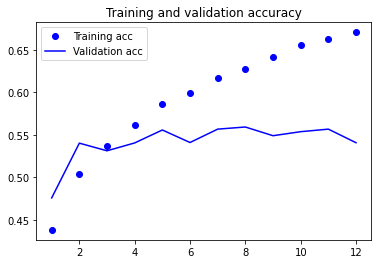

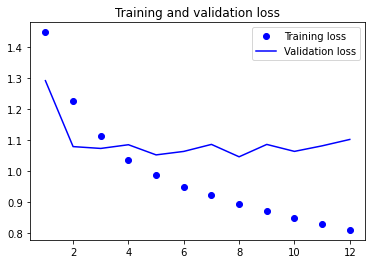

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Going back to second approach

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [7]:
model.compile(loss='categorical_crossentropy', 
               optimizer='Adam',
               metrics=['accuracy'])

#### Training the convnet using data-augmentation generators

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,                
    target_size=(150,150),         
    batch_size = 246, 
    class_mode='categorical')  

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,                
    target_size=(150,150),         
    batch_size = 246, 
    class_mode='categorical')  



Found 24698 images belonging to 4 classes.
Found 4000 images belonging to 4 classes.


In [9]:
history = model.fit(
    train_generator,  
    epochs = 45, 
    validation_data = validation_generator) 

model.save('paintingstopAdam.h5')

Epoch 1/45
101/101 [==============================] - 1159s 11s/step - loss: 1.3094 - accuracy: 0.3657 - val_loss: 1.2828 - val_accuracy: 0.3850
Epoch 2/45
101/101 [==============================] - 956s 9s/step - loss: 1.2300 - accuracy: 0.4326 - val_loss: 1.1923 - val_accuracy: 0.4613
Epoch 3/45
101/101 [==============================] - 962s 10s/step - loss: 1.1808 - accuracy: 0.4609 - val_loss: 1.1471 - val_accuracy: 0.4942
Epoch 4/45
101/101 [==============================] - 958s 9s/step - loss: 1.1467 - accuracy: 0.4848 - val_loss: 1.1525 - val_accuracy: 0.4882
Epoch 5/45
101/101 [==============================] - 956s 9s/step - loss: 1.1308 - accuracy: 0.4923 - val_loss: 1.1390 - val_accuracy: 0.4990
Epoch 6/45
101/101 [==============================] - 956s 9s/step - loss: 1.1129 - accuracy: 0.5055 - val_loss: 1.0785 - val_accuracy: 0.5335
Epoch 7/45
101/101 [==============================] - 956s 9s/step - loss: 1.1002 - accuracy: 0.5142 - val_loss: 1.0671 - val_accuracy: 0.5

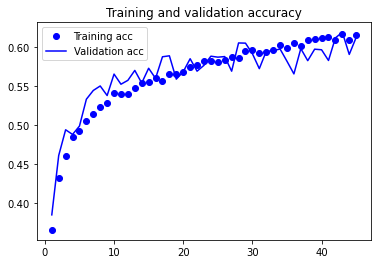

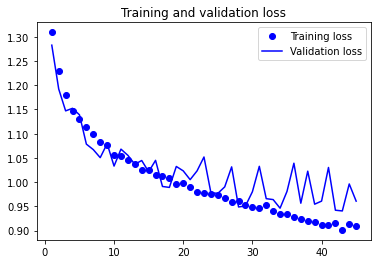

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Predicting test images

In [103]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,                
    target_size=(150,150),         
    batch_size = 246, 
    class_mode='categorical') 

modeltop= models.load_model('paintingstopAdam.h5')
Y_pred = modeltop.predict(test_generator, math.ceil(len(test_generator.filenames) / 246))


Found 8766 images belonging to 4 classes.


In [117]:
pred_labels = np.argmax(Y_pred, axis = 1)
pred_labels

array([0, 3, 3, ..., 1, 3, 3], dtype=int64)

In [119]:
Y_pred

array([[0.8404234 , 0.10540193, 0.00477527, 0.04939937],
       [0.11574452, 0.12478609, 0.35788167, 0.40158778],
       [0.17997596, 0.2545046 , 0.14995584, 0.41556358],
       ...,
       [0.04218362, 0.6958151 , 0.16561513, 0.09638619],
       [0.01395901, 0.40697145, 0.14983903, 0.42923045],
       [0.07395226, 0.08230124, 0.26470423, 0.57904226]], dtype=float32)

In [120]:
test_loss = modeltop.evaluate(test_generator)

36/36 [==============================] - 199s 6s/step - loss: 0.9965 - accuracy: 0.5844


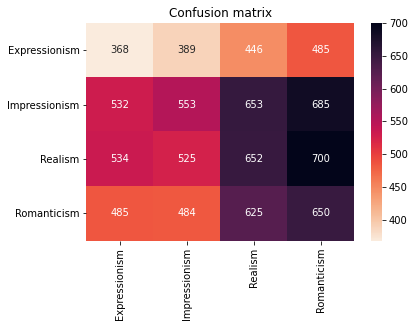

In [133]:
CM = confusion_matrix(test_generator.classes, pred_labels)
target_names = ['Expressionism', 'Impressionism','Realism','Romanticism']
ax = plt.axes()
sn.heatmap(CM, cmap='rocket_r',
           annot=True, 
           fmt='d',
           xticklabels=target_names, 
           yticklabels=target_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()